In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import yfinance as yf

In [2]:
S= "EXPE"
stk = yf.Ticker(S)
df= stk.history(period="10y")
df.iloc[:,0:5].to_csv("modeldata//"+S+".csv")

In [3]:
df= pd.read_csv("modeldata//"+S+".csv",index_col="Date",parse_dates=True)
df=df[1:len(df)]
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-11-08,36.176564,37.253487,35.977135,37.253487,3333200
2010-11-09,37.479520,37.692245,36.096805,36.362713,2415100
2010-11-10,36.296228,36.575431,35.830894,36.508953,1130600
2010-11-11,36.043618,36.482364,35.631461,36.322819,988300
2010-11-12,36.070195,36.256331,35.046458,35.445316,1889500


In [4]:
df.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-11-08 to 2020-11-04
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2516 non-null   float64
 1   High    2516 non-null   float64
 2   Low     2516 non-null   float64
 3   Close   2516 non-null   float64
 4   Volume  2516 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 117.9 KB


<AxesSubplot:xlabel='Date'>

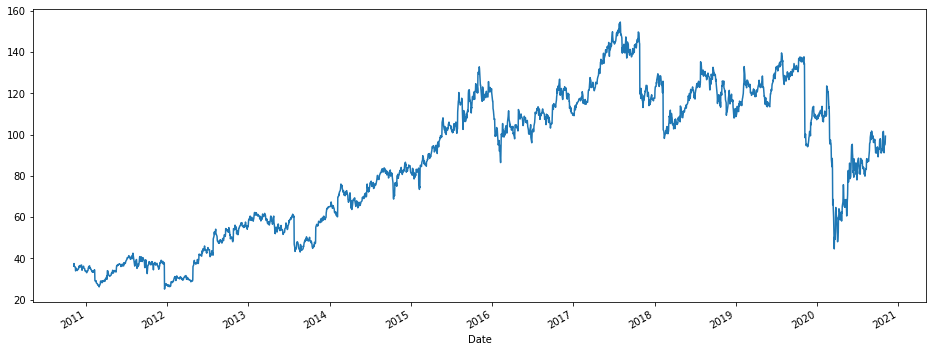

In [6]:
df['Open'].plot(figsize=(16,6))

In [7]:
df= df[['Open']]
training_df= df[:int(len(df)*(4/5))]
testing_df= df[int(len(df)*(4/5)):]

In [8]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_df = sc.fit_transform(training_df)
testing_df= sc.transform(testing_df)

# Training

In [9]:
X_train = []
y_train = []
for i in range(60, len(training_df)):
    X_train.append(training_df[i-60:i])
    y_train.append(training_df[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [10]:
X_train.shape

(1952, 60, 1)

In [11]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [12]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [13]:
# Initialising the RNN
regressor = Sequential()

In [14]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))


In [15]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1952/1952 [==============================] - 7s 4ms/step - loss: 0.0266
Epoch 2/100
1952/1952 [==============================] - 6s 3ms/step - loss: 0.0052
Epoch 3/100
1952/1952 [==============================] - 7s 3ms/step - loss: 0.0045
Epoch 4/100
1952/1952 [==============================] - 7s 4ms/step - loss: 0.0041
Epoch 5/100
1952/1952 [==============================] - 8s 4ms/step - loss: 0.0039
Epoch 6/100
1952/1952 [==============================] - 7s 4ms/step - loss: 0.0036
Epoch 7/100
1952/1952 [==============================] - 7s 4ms/step - loss: 0.0040
Epoch 8/100
1952/1952 [==============================] - 9s 5ms/step - loss: 0.0035
Epoch 9/100
1952/1952 [==============================] - 8s 4ms/step - loss: 0.0041
Epoch 10/100
1952/1952 [==============================] - 8s 4ms/step - loss: 0.0035
Epoch 11/100
1952/1952 [==============================] - 8s 4ms/step - loss: 0.0033
Epoch 12/100
1952/1952 [==============================] - 7s 4ms/step - lo

# Testing

In [16]:
X_test = []
y_test = []
for i in range(60, len(testing_df)):
    X_test.append(testing_df[i-60:i])
    y_test.append(testing_df[i,0])
X_test, y_test = np.array(X_test), np.array(y_test)

In [17]:
X_test

array([[[0.76673546],
        [0.76392781],
        [0.76628011],
        ...,
        [0.70306301],
        [0.71242103],
        [0.7154643 ]],

       [[0.76392781],
        [0.76628011],
        [0.77933193],
        ...,
        [0.71242103],
        [0.7154643 ],
        [0.73265865]],

       [[0.76628011],
        [0.77933193],
        [0.75429068],
        ...,
        [0.7154643 ],
        [0.73265865],
        [0.75137462]],

       ...,

       [[0.45096043],
        [0.44810245],
        [0.48278426],
        ...,
        [0.52295034],
        [0.51051431],
        [0.53901671]],

       [[0.44810245],
        [0.48278426],
        [0.48857744],
        ...,
        [0.51051431],
        [0.53901671],
        [0.54032988]],

       [[0.48278426],
        [0.48857744],
        [0.47776349],
        ...,
        [0.53901671],
        [0.54032988],
        [0.54728165]]])

In [18]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [19]:
X_test

array([[[0.76673546],
        [0.76392781],
        [0.76628011],
        ...,
        [0.70306301],
        [0.71242103],
        [0.7154643 ]],

       [[0.76392781],
        [0.76628011],
        [0.77933193],
        ...,
        [0.71242103],
        [0.7154643 ],
        [0.73265865]],

       [[0.76628011],
        [0.77933193],
        [0.75429068],
        ...,
        [0.7154643 ],
        [0.73265865],
        [0.75137462]],

       ...,

       [[0.45096043],
        [0.44810245],
        [0.48278426],
        ...,
        [0.52295034],
        [0.51051431],
        [0.53901671]],

       [[0.44810245],
        [0.48278426],
        [0.48857744],
        ...,
        [0.51051431],
        [0.53901671],
        [0.54032988]],

       [[0.48278426],
        [0.48857744],
        [0.47776349],
        ...,
        [0.53901671],
        [0.54032988],
        [0.54728165]]])

In [20]:
predicted_stock_price = regressor.predict(X_test)

In [21]:
predicted_stock_price

array([[0.7071731 ],
       [0.71630615],
       [0.7303453 ],
       [0.746659  ],
       [0.75721943],
       [0.787076  ],
       [0.79472214],
       [0.7792777 ],
       [0.7618899 ],
       [0.7556524 ],
       [0.76080525],
       [0.7571397 ],
       [0.76303476],
       [0.7695358 ],
       [0.7715497 ],
       [0.7693696 ],
       [0.76135504],
       [0.7593076 ],
       [0.7591261 ],
       [0.7556635 ],
       [0.7555622 ],
       [0.75377387],
       [0.75597703],
       [0.7555491 ],
       [0.74378234],
       [0.7353782 ],
       [0.733119  ],
       [0.7291999 ],
       [0.72749436],
       [0.7283328 ],
       [0.72966456],
       [0.7300991 ],
       [0.7334993 ],
       [0.7361803 ],
       [0.74099195],
       [0.73544645],
       [0.73622936],
       [0.7381549 ],
       [0.7307334 ],
       [0.72310174],
       [0.7220591 ],
       [0.7220138 ],
       [0.7261923 ],
       [0.73174417],
       [0.7373904 ],
       [0.7371124 ],
       [0.7377529 ],
       [0.741

In [22]:
y_test= np.reshape(y_test, (y_test.shape[0], 1))
y_test.shape

(444, 1)

In [23]:
y_test

array([[0.73265865],
       [0.75137462],
       [0.76932983],
       [0.77374257],
       [0.83323824],
       [0.80280561],
       [0.77724232],
       [0.76468883],
       [0.76537364],
       [0.77427521],
       [0.75380924],
       [0.78211148],
       [0.78249194],
       [0.78211153],
       [0.77861176],
       [0.7643845 ],
       [0.77161226],
       [0.76704747],
       [0.75852633],
       [0.76506933],
       [0.75761329],
       [0.76667244],
       [0.75957886],
       [0.73494202],
       [0.73715395],
       [0.73654387],
       [0.72540761],
       [0.72922132],
       [0.73158597],
       [0.73250124],
       [0.73234872],
       [0.74089146],
       [0.74043381],
       [0.74966308],
       [0.72853494],
       [0.74562052],
       [0.74150169],
       [0.72159386],
       [0.72029723],
       [0.72563651],
       [0.72144135],
       [0.73288253],
       [0.73845068],
       [0.74554426],
       [0.73860323],
       [0.74516291],
       [0.75080725],
       [0.755

In [24]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
actual_stock_price = sc.inverse_transform(y_test)

In [25]:
predicted_stock_price

array([[116.649956],
       [117.832344],
       [119.64989 ],
       [121.7619  ],
       [123.12908 ],
       [126.99439 ],
       [127.98428 ],
       [125.9848  ],
       [123.733734],
       [122.926216],
       [123.593315],
       [123.11876 ],
       [123.88195 ],
       [124.72359 ],
       [124.984314],
       [124.70208 ],
       [123.66449 ],
       [123.39943 ],
       [123.37593 ],
       [122.92765 ],
       [122.914536],
       [122.683014],
       [122.96824 ],
       [122.912834],
       [121.38948 ],
       [120.30146 ],
       [120.00898 ],
       [119.5016  ],
       [119.2808  ],
       [119.38935 ],
       [119.56176 ],
       [119.61801 ],
       [120.05821 ],
       [120.405304],
       [121.02823 ],
       [120.310295],
       [120.41165 ],
       [120.66094 ],
       [119.700134],
       [118.71212 ],
       [118.57713 ],
       [118.571266],
       [119.11223 ],
       [119.83099 ],
       [120.561966],
       [120.52598 ],
       [120.608894],
       [121.0

In [26]:
actual_stock_price.shape

(444, 1)

In [27]:
predicted_stock_price.shape

(444, 1)

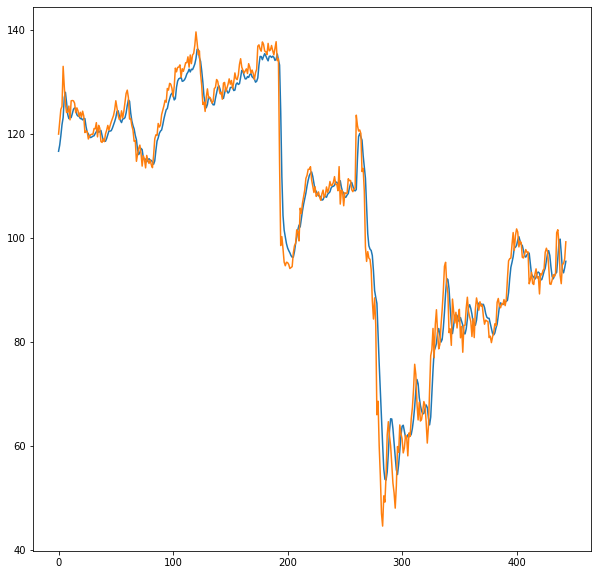

In [28]:
plt.figure(figsize=(10,10))
plt.plot(predicted_stock_price)
plt.plot(actual_stock_price)

In [29]:
pred_df=pd.DataFrame(predicted_stock_price)
act_df= pd.DataFrame(actual_stock_price)

In [30]:
predicted_stock_price= predicted_stock_price[-433:]
df=df[-433:]
df['Open2']= predicted_stock_price


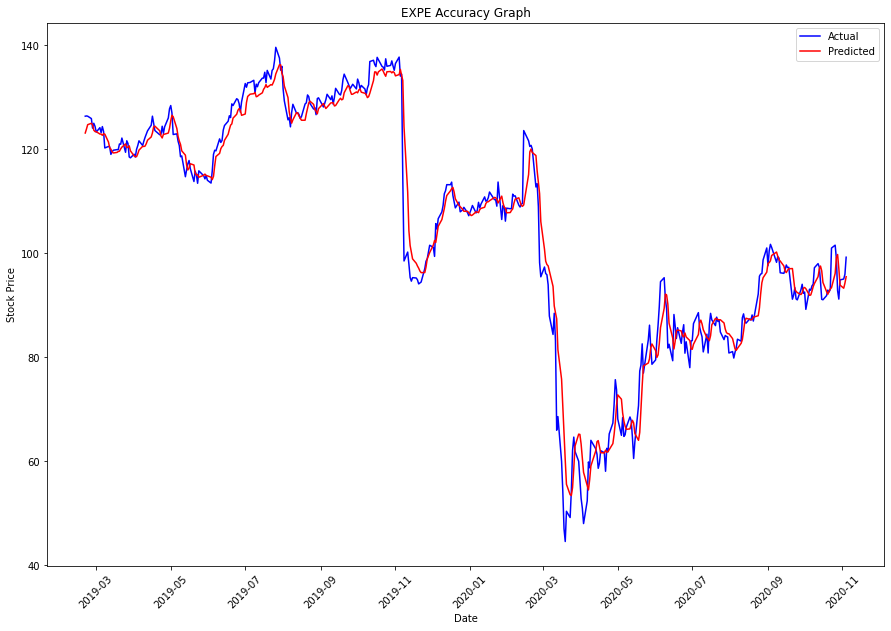

In [31]:
plt.figure(figsize=(15,10))
plt.plot(df['Open'], color='blue')
plt.plot(df['Open2'], color='red')
plt.title(S+" Accuracy Graph",fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Stock Price',fontsize=20)
plt.xticks(rotation=45)
plt.legend(['Actual','Predicted'],fontsize=20)
plt.rc('ytick', labelsize=17)
plt.rc('xtick', labelsize=14)
plt.savefig("modeldata//"+S+'accuracy_graph.png')

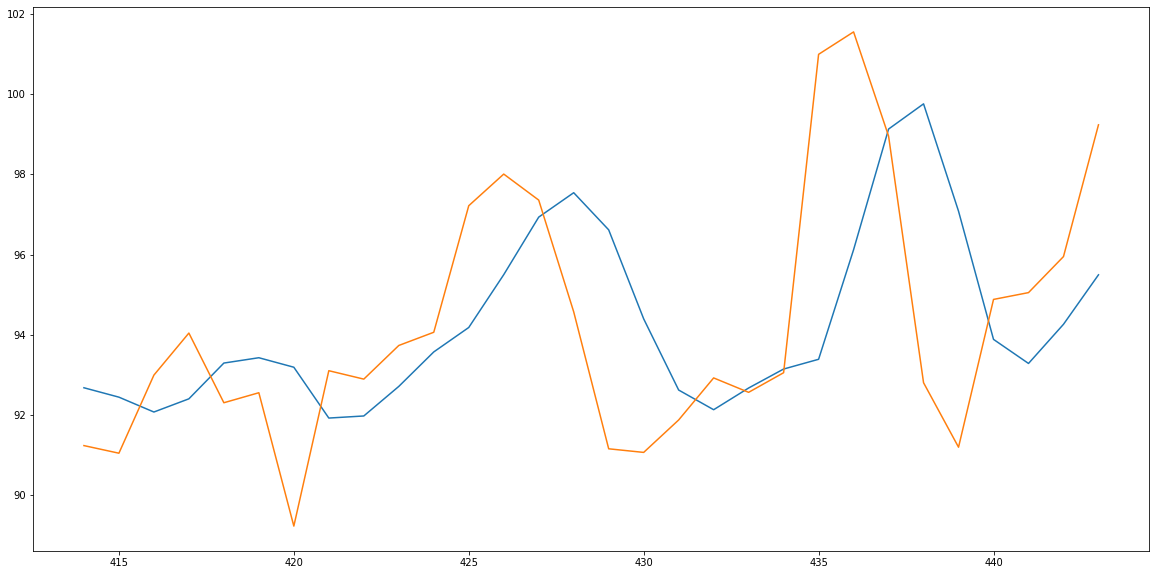

In [32]:
plt.figure(figsize=(20,10))
length= len(pred_df)
plt.plot(pred_df[length-30:])
plt.plot(act_df[length-30:])

In [33]:
import pickle
Pkl_Filename = "modeldata//"+S+".pkl"  
sc_file= "modeldata//"+S+"_sc.pkl"

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(regressor, file)
    
with open(sc_file, 'wb') as file:  
    pickle.dump(sc, file)